# Time course growth and substrate  data ➟ Growth parameters

By Christina Schenk and Garrett Roell

Tested on biodesign_3.7 kernel on jprime


This notebook calculates the growth rate, yield coefficient, and substrate uptake rate of R. opacus cultures growing with phenol and glucose. These experiements were published in this paper: [Henson (2018)](https://www.sciencedirect.com/science/article/pii/S1096717618300910).

#### Henson data:
* WT 0.5 g/L Phenol (3 trials) (**WT-P**)
* PVHG6 0.5 g/L Phenol (3 trials) (**PVHG-P**)

#### Rhiannon 2018 data (New data for this paper):
* Metabolomics and OD data for WT Glucose (**WT-G**)

### Method: 
<ol>
<li>Calculate growth rate by finding slope of log(biomass) vs. time</li>
<li>Simulate biomass growth by using timepoints and X = X0e^(mu*t)</li>
<li>Calculate yield coefficient by finding the slope of the biomass generated vs substrate consumed</li>
<li>Calculate substrate uptake rate by dividing the growth rate by the yield coefficient</li>
</ol>

#### **Setup imports**

In [11]:
import sys
import pandas as pd

SourceDir = '../src'
sys.path.append(SourceDir)
from utils import *
from plot import *

#### **Create blank growth parameter dataframe**
The dataframe will hold the data calculated in this notebook

In [12]:
# create dataframe for all results:
columns = ['growth rate', 'yield coefficient',  'substrate consumption rate', 'growth rate std dev', 'yield coefficient std dev', 'substrate consumption rate std dev']
strains = ['WT-P', 'PVHG-P', 'WT-G']

growth_parameter_df = pd.DataFrame(index=strains, columns=columns, dtype=float)
growth_parameter_df.head()

,growth rate,yield coefficient,substrate consumption rate,growth rate std dev,yield coefficient std dev,substrate consumption rate std dev
WT-P,NaN,NaN,NaN,NaN,NaN,NaN
PVHG-P,NaN,NaN,NaN,NaN,NaN,NaN
WT-G,NaN,NaN,NaN,NaN,NaN,NaN


#### **Set g/L per OD value** 

In [13]:
# 1 OD = 0.368 g/L of biomass
GRAMS_BIOMASS_PER_LITER_PER_OD = 0.368 

#### **Load Phenol Data from Henson Data Set**

In [14]:
from edd_utils import login, export_study, export_metadata

# EDD infomation
study_slug = 'biodesign_henson2018_reprocessed'
edd_server = 'public-edd.jbei.org'
user       = 'garrettroell'

session = login(edd_server=edd_server, user=user)

Password for garrettroell:  ················


In [15]:
phenol_df = export_study(session, study_slug, edd_server=edd_server)

#### **Get Phenol OD and substrate data**

In [16]:
phenol_od_df = phenol_df[phenol_df['Protocol'].str.contains('OD600')]
phenol_od_df.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*phenol_od_df['Value']
phenol_substrate_df = phenol_df[phenol_df['Protocol'].str.contains('HPLC')]

print(f'substrate data has {len(phenol_substrate_df)} lines')
print(f'OD data has {len(phenol_od_df)} lines')

substrate data has 48 lines
OD data has 60 lines


In [11]:
phenol_od_df.head(2)

,Study ID,Study Name,Line ID,Replicate Key,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours,Biomass Conc
440385,14409,Biodesign_Henson2018_reprocessed,14892,b512abae062c4a119ff19704ed174046,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,OD600,14975,WT-P-R1,NaN,Optical Density,0,NaN,0.05000,0.0,0.018400
440386,14409,Biodesign_Henson2018_reprocessed,14892,b512abae062c4a119ff19704ed174046,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,OD600,14975,WT-P-R1,NaN,Optical Density,0,NaN,0.09559,9.0,0.035177


#### **Calculate wildtype phenol growth parameters**

In [18]:
growth_parameter_df.at['WT-P',:]=[growth_rate_WTP, 
                                    yield_coeff_WTP, 
                                    substrate_consumption_rate_WTP, 
                                    growth_rate_std_WTP, 
                                    yield_coeff_std_WTP, 
                                    substrate_consumption_rate_std_WTP
                                ]
growth_parameter_df

,growth rate,yield coefficient,substrate consumption rate,growth rate std dev,yield coefficient std dev,substrate consumption rate std dev
WT-P,0.065488,0.048868,1.352072,0.001345,0.004836,0.122279
PVHG-P,NaN,NaN,NaN,NaN,NaN,NaN
WT-G,NaN,NaN,NaN,NaN,NaN,NaN


#### **Add wildtype phenol data to dataframe**

In [16]:
phenol_od_df_2 = phenol_od_df[phenol_od_df['Line Name'].str.contains('PVHG-P')]
phenol_substrate_df_2 = phenol_substrate_df[phenol_substrate_df['Line Name'].str.contains('PVHG-P')]

In [ ]:
# [growth_rate_PVHGP, 
#  yield_coeff_PVHGP, 
#  substrate_consumption_rate_PVHGP, 
#  growth_rate_std_PVHGP, 
#  yield_coeff_std_PVHGP, 
#  substrate_consumption_rate_std_PVHGP] = stats_for_condition(
#     phenol_od_df_2, 
#     phenol_substrate_df_2, 
#     'PVHG-P-R1', 
#     'PVHG-P-R2', 
#     'PVHG-P-R3', 
#     94.11, 
#     substrate='phenol', 
#     max_time=40
# )

#### **Calculate PVHG6 phenol growth parameters**

growth_rate = 0.080 ± 0.003 hr-1
yield coefficient = 0.041 ± 0.002 g biomass / mmol substrate
substrate consumption rate = 1.967 ± 0.022 mmol substrate/gram biomass * hr


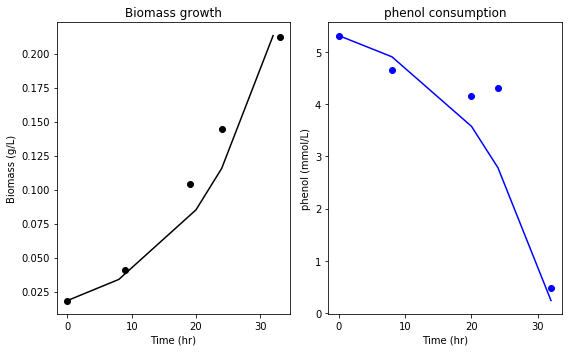

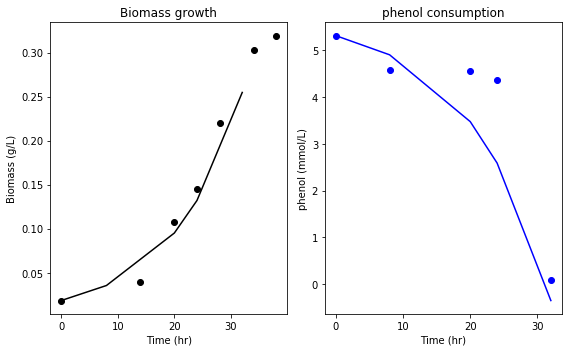

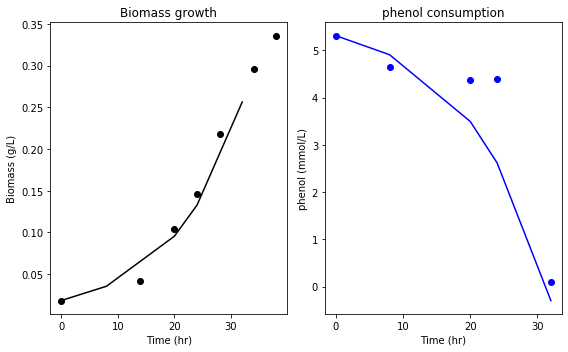

In [20]:
[growth_rate_PVHGP, 
 yield_coeff_PVHGP, 
 substrate_consumption_rate_PVHGP, 
 growth_rate_std_PVHGP, 
 yield_coeff_std_PVHGP, 
 substrate_consumption_rate_std_PVHGP] = stats_for_condition(
    phenol_od_df, 
    phenol_substrate_df, 
    'PVHG-P-R1', 
    'PVHG-P-R2', 
    'PVHG-P-R3', 
    94.11, 
    substrate='phenol', 
    max_time=40
)

#### **Add PVHG6 phenol data to dataframe**

In [21]:
growth_parameter_df.at['PVHG-P',:]=[growth_rate_PVHGP, 
                                    yield_coeff_PVHGP, 
                                    substrate_consumption_rate_PVHGP, 
                                    growth_rate_std_PVHGP, 
                                    yield_coeff_std_PVHGP, 
                                    substrate_consumption_rate_std_PVHGP
                                ]
growth_parameter_df

,growth rate,yield coefficient,substrate consumption rate,growth rate std dev,yield coefficient std dev,substrate consumption rate std dev
WT-P,0.065488,0.048868,1.352072,0.001345,0.004836,0.122279
PVHG-P,0.080331,0.040848,1.967485,0.002672,0.001757,0.021785
WT-G,NaN,NaN,NaN,NaN,NaN,NaN


#### **Load glucose data from EDD**

In [22]:
glucose_study_slug = 'rhodococcus-opacus-pd630-rhiannon-2018'

#Export data from EDD as dataframe:
glucose_df = export_study(session, glucose_study_slug, edd_server=edd_server)
glucose_df.head(2)

,Study ID,Study Name,Line ID,Replicate Key,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,15279,Rhodococcus opacus PD630 Rhiannon 2018,15280,24113c70-2925-4712-aafc-d272ab4e41e5,WT-R1,Wild Type R.opacus grown on glucose. Replicate 1,OD600,15283,WT-R1,NaN,Optical Density,0,NaN,0.05000,0.0
1,15279,Rhodococcus opacus PD630 Rhiannon 2018,15280,24113c70-2925-4712-aafc-d272ab4e41e5,WT-R1,Wild Type R.opacus grown on glucose. Replicate 1,OD600,15283,WT-R1,NaN,Optical Density,0,NaN,0.19908,5.0


#### **Load glucose data from EDD**

In [23]:
glucose_od_df = glucose_df[glucose_df['Protocol'].str.contains('OD600')]
glucose_od_df.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*glucose_od_df.loc[:,'Value']

glucose_substrate_df = glucose_df[glucose_df['Protocol'].str.contains('Other')]

print(f'substrate data has {len(glucose_substrate_df)} lines')
print(f'OD data has {len(glucose_od_df)} lines')

substrate data has 12 lines
OD data has 12 lines


#### **Calculate glucose growth parameters**

growth_rate = 0.260 ± 0.005 hr-1
yield coefficient = 0.073 ± 0.004 g biomass / mmol substrate
substrate consumption rate = 3.582 ± 0.142 mmol substrate/gram biomass * hr


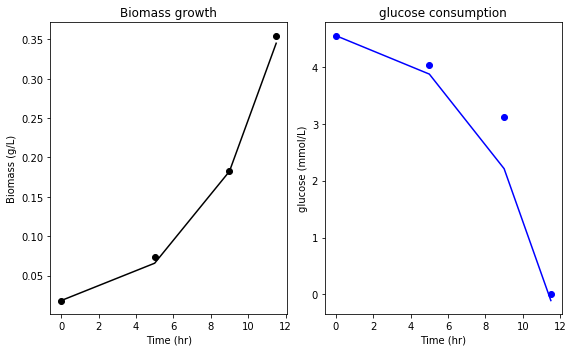

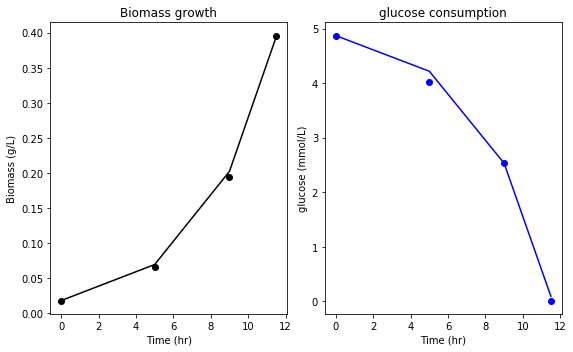

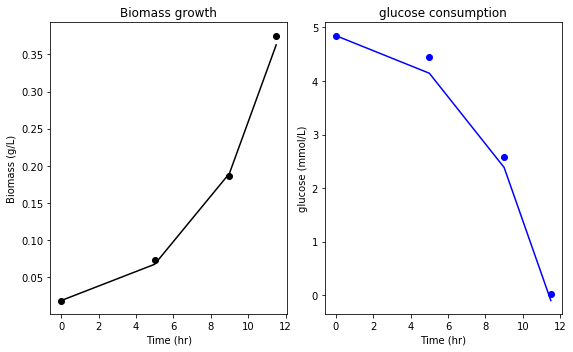

In [24]:
[growth_rate_WTG, 
 yield_coeff_WTG, 
 substrate_consumption_rate_WTG, 
 growth_rate_std_WTG, 
 yield_coeff_std_WTG, 
 substrate_consumption_rate_std_WTG] = stats_for_condition(
    glucose_od_df, 
    glucose_substrate_df, 
    'WT-R1', 
    'WT-R2', 
    'WT-R3', 
    180.16, 
    substrate='glucose', 
    max_time=12
)

#### **Add glucose growth parameters to dataframe**

In [25]:
growth_parameter_df.at['WT-G',:]=[growth_rate_WTG, 
                                    yield_coeff_WTG, 
                                    substrate_consumption_rate_WTG, 
                                    growth_rate_std_WTG, 
                                    yield_coeff_std_WTG, 
                                    substrate_consumption_rate_std_WTG
                                 ]
growth_parameter_df

,growth rate,yield coefficient,substrate consumption rate,growth rate std dev,yield coefficient std dev,substrate consumption rate std dev
WT-P,0.065488,0.048868,1.352072,0.001345,0.004836,0.122279
PVHG-P,0.080331,0.040848,1.967485,0.002672,0.001757,0.021785
WT-G,0.260195,0.072789,3.582471,0.004749,0.004117,0.141675


##### **Write data frame to file**

In [26]:
growth_parameter_df.to_csv('../data/growth_rates/experimental_growth_parameters.csv')